In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv

--2021-10-01 13:58:26--  http://handsonml.control.lth.se/data/training_data.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54950 (54K) [text/csv]
Saving to: ‘training_data.csv’

training_data.csv   100%[===================>]  53.66K   269KB/s    in 0.2s    

2021-10-01 13:58:27 (269 KB/s) - ‘training_data.csv’ saved [54950/54950]

--2021-10-01 13:58:27--  http://handsonml.control.lth.se/data/songs_to_classify.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14306 (14K) [text/csv]
Saving to: ‘songs_to_classify.csv’

songs_to_classify.c 100%[==========

In [9]:
# Load data
train = pd.read_csv("training_data.csv")
test_classify = pd.read_csv("songs_to_classify.csv")

In [10]:
df = pd.read_csv('training_data.csv')
X = df.drop(columns=['label'])
y = df.loc[:,'label'].values

features = ['danceability','acousticness', 'instrumentalness', 'energy', 'valence',
            'loudness', 'liveness', 'speechiness', 'tempo', 'duration']
features_cat = ['time_signature', 'key', 'mode']

# Scaling the dataset to ensure more accurate results
from sklearn.preprocessing import StandardScaler
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(sparse = False, handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, features_cat),
    ('standard-scaler', numerical_preprocessor, features)])


In [11]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000,C=0.1,tol=0.01))

In [12]:
# Split into dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model.fit(X_train, np.ravel(y_train))

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['time_signature', 'key',
                                                   'mode']),
                                                 ('standard-scaler',
                                                  StandardSc

In [14]:
# Calculate accuracy: Evaluate the models using cross-validation
# Make Predictions on Test Data and compare with truth
scores = cross_val_score(model, X, np.ravel(y), cv=25)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))
score = model.score(X_test, np.ravel(y_test))
print('Test score: ', '{0:.4f}'.format(score*100))

81.33 accuracy with a standard deviation of 0.07
Test score:  80.6667


In [15]:
# # Make Predictions on Test Data and compare with truth
pred = model.predict(X_test)

In [16]:
# Make Predictions on Test Data and compare with truth
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, pred))

[[42 12]
 [17 79]]


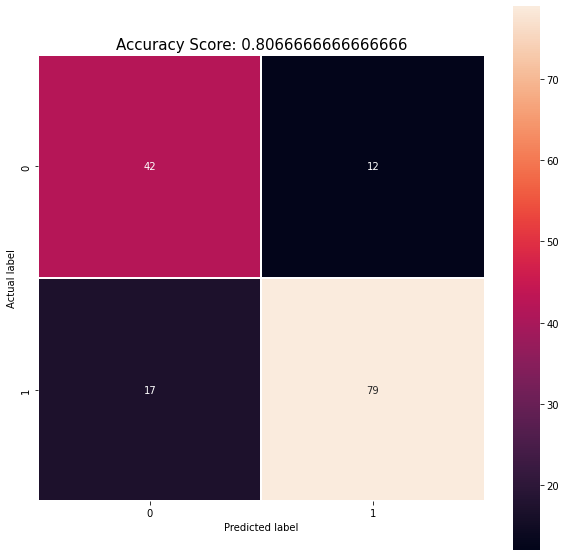

In [17]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

In [18]:
final_y = model.predict(test_classify)

In [19]:
final =''.join(str(final_y).split(' ,')).replace(" ", "").replace('\n', "")
final

'[01010011101101101011001100110010011111010101010110001101100011001111101011110110111101111010001011111010010111110111101101101110101011111101101011001011001111100101101110111000111001111110100111100111]'

The ROC curve


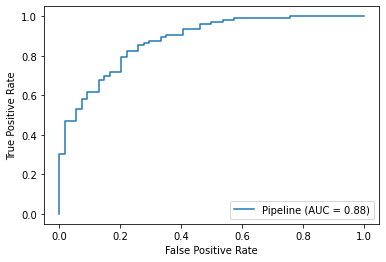

In [42]:
from sklearn import metrics
metrics.plot_roc_curve(model, X_test, y_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        54
           1       0.87      0.82      0.84        96

    accuracy                           0.81       150
   macro avg       0.79      0.80      0.79       150
weighted avg       0.81      0.81      0.81       150

